# NaK model analysis

Here we will show you the neurodynamics analysis of a two-dimensional system model with the example of the $I_{\rm{Na,p+}}-I_K$ Model. 

The dynamical system is given by:
$$ C\dot{V} = I_{ext} - g_L * (V-E_L)-g_{Na}*m_\infty(V)(V-E_{Na})-g_K*n*(V-E_K)$$

$$ \dot{n} = \frac{n_\infty(V)-n}{\tau(V)} $$

where

$$ m_\infty(V) = 1 \ / \ ({1+\exp(\frac{V_{\rm{n_{half}}}-V}{k_m})}) $$

$$ n_\infty(V) = 1 \ / \ ({1+\exp(\frac{V_{\rm{n_{half}}}-V}{k_n})}) $$

This model specifies a leak current $I_L$, persistent sodium current $I_{\rm{Na, p}}$ 
with instantaneous activation kinetic, and a relatively slower persistent 
potassium current $I_K$ with either high or low threshold (the two choices 
result in fundamentally different dynamics). 

In [1]:
import brainpy as bp
import brainpy.math as bm

bm.set_dt(dt=0.02)

In [2]:
C = 1
E_L = -78  # different from high-threshold model
g_L = 8
g_Na = 20
g_K = 10
E_K = -90
E_Na = 60
Vm_half = -20
k_m = 15
Vn_half = -45  # different from high-threshold model
k_n = 5
tau = 1


@bp.odeint
def integral(V, n, t, Iext):
  m_inf = 1 / (1 + bm.exp((Vm_half - V) / k_m))
  I_leak = g_L * (V - E_L)
  I_Na = g_Na * m_inf * (V - E_Na)
  I_K = g_K * n * (V - E_K)
  dvdt = (-I_leak - I_Na - I_K + Iext) / C

  n_inf = 1 / (1 + bm.exp((Vn_half - V) / k_n))
  dndt = (n_inf - n) / tau

  return dvdt, dndt

### Phase plane analysis

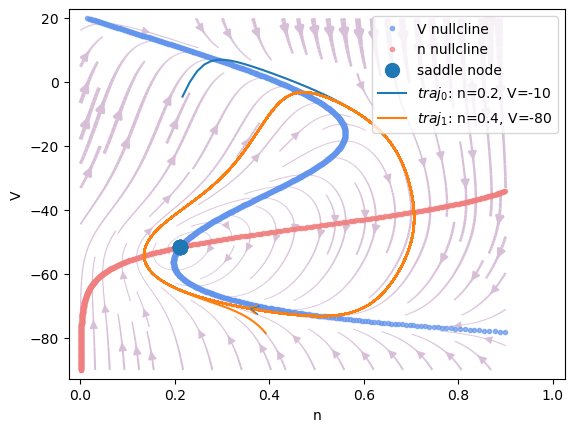

In [3]:
# analyzer = bp.symbolic.PhasePlane(
#   integral,
#   target_vars=dict(n=[0., 1.], V=[-90, 20], ),
#   pars_update={'Iext': 50.},
# )
# analyzer.plot_nullcline()
# analyzer.plot_vector_field()
# analyzer.plot_fixed_point()
# analyzer.plot_trajectory([{'V': -10, 'n': 0.2}, {'V': -80, 'n': 0.4}],
#                          duration=100.,
#                          show=True)

### Codimension 1 bifurcation analysis

Here we show the codimension 1 bifurcation analysis of the $I_{\rm{Na,p+}}-I_K$ Model, in which $I_{ext}$ is varied in [0., 50.].

In [ ]:
analyzer = bp.symbolic.OldBifurcation(
  integral,
  target_pars={'Iext': [0, 50.]},
  target_vars={"V": [-90., 20.], 'n': [0., 1.],  },
  numerical_resolution={'Iext': 1., 'V': 1., 'n': 0.1},
  options={'sympy_solver_timeout': 20}
)
analyzer.plot_bifurcation(show=True)

C:\Users\adadu\miniconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


### Codimension 2 bifurcation analysis

Codimension 2 bifurcation analysis of the $I_{\rm{Na,p+}}-I_K$ Model, in which $I_{ext}$ is varied in [0., 50.], and "Vn_half" is varied in [-50, -40].

In [ ]:
analyzer = bp.symbolic.OldBifurcation(
  integral,
  target_pars={'Iext': [0, 50.], 'Vn_half': [-50, -40]},
  target_vars={'n': [0., 1.], "V": [-90., 20.], },
  numerical_resolution=0.1)

analyzer.plot_bifurcation(show=True)

### Reference

1. Izhikevich, Eugene M. Dynamical systems in neuroscience (Chapter 4). MIT press, 2007.